In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2
%config Completer.use_jedi = True
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rc("figure", dpi=100)
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore')
import scalp
from scalp.output import draw
import lmz
import numpy as np
from scipy.sparse import csr_matrix
import scanpy as sc
import seaborn as sns

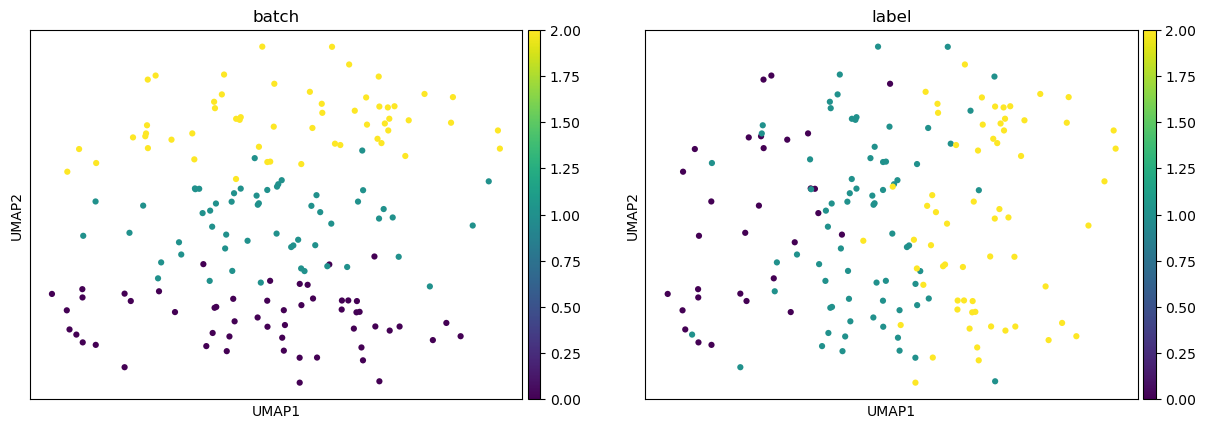

In [112]:
# dataset = scalp.data.mkblobs(sizes = [[24,21],[25,20],[23,22]], clusterspread = .3, batchspread = 4)
dataset = scalp.data.mkblobs(sizes = [[10,24,21],[10,25,20],[10,23,22]], 
                             clusterspread = .5, batchspread = 1.5)
#dataset = scalp.data.mkblobs(sizes = [[3,5],[5,3]], clusterspread = .1, batchspread = 4)
for d in dataset:
    d.obsm['umap'] = d.X
stack = scalp.transform.stack(dataset)
sc.pl.umap(stack, color=['batch', 'label'], s= 80)

redundant pca :) 


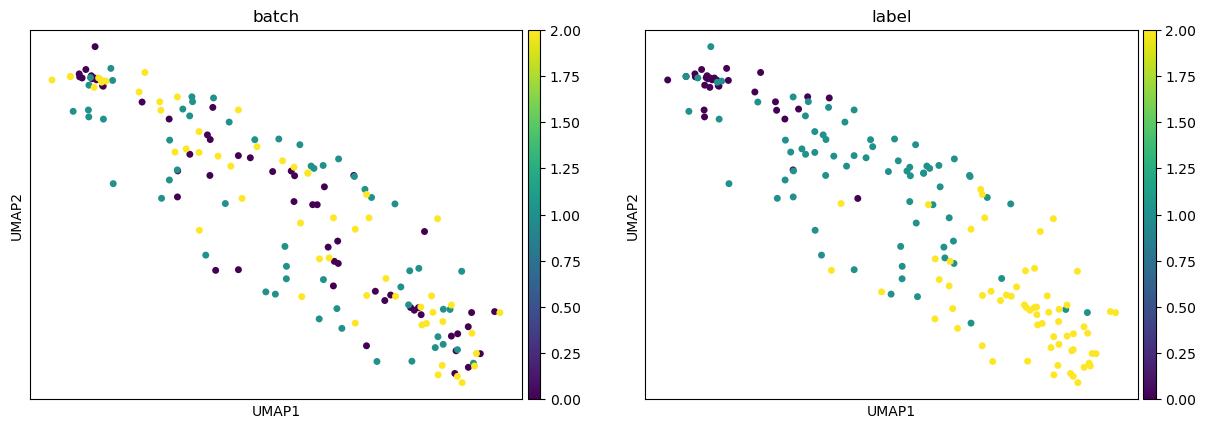

In [118]:
from scipy.sparse.csgraph import dijkstra
from scalp import graph as sgraph
import pacmap
parm = {'neighbors_total': 30,
         'neighbors_intra_fraction': .5,
         'add_tree': False,
         'epsilon'  : 1e-1, 
          'copy_lsa_neighbors': False, 
         'inter_outlier_threshold': .9,
         'inter_outlier_probabilistic_removal': False}

dataset, graph = scalp.mkgraph(dataset,**parm)
neggraph = sgraph.negstuff(dataset,**parm)
graph = csr_matrix(graph)
# graph[graph >= 100] = 2
# graph = csr_matrix(graph).toarray()

#graph[graph==0] = 99
# fullgraph = dijkstra(graph)
# scalp.umapwrap.graph_umap(dataset,graph,label = 'umap', n_components = 2)
# scalp.umapwrap.graph_pacmap(dataset,graph,label = 'umap', n_components = 2, neighbors = None, MN  = .2, FP = 2)
scalp.umapwrap.graph_jax(dataset,(csr_matrix(graph),
                                  csr_matrix(neggraph)),label = 'umap', n_components = 2)
# scalp.umapwrap.graph_umap(dataset,graph,label = 'umap', n_components = 2)

stack = scalp.transform.stack(dataset)
sc.pl.umap(stack, color=['batch', 'label'], s= 100)

#sns.heatmap(neggraph.toarray())
#plt.show()

# from sklearn.metrics.pairwise import euclidean_distances
# sns.heatmap(euclidean_distances(stack.obsm['umap']))
# plt.show()

In [105]:
mask = (graph.toarray()>0 )& (neggraph.toarray() > 0)
st = (csr_matrix(graph),csr_matrix(neggraph))
st[0][mask] = 0
scalp.umapwrap.graph_jax(dataset,st,label = 'umap', n_components = 2)[0].obsm['umap']

Array([[-1.07170256, -1.25354597],
       [ 1.60976975,  2.00898309],
       [-1.38750503, -1.39386022],
       [ 0.15118955, -0.75746523],
       [ 0.41735662, -0.62653737],
       [ 0.25664813, -0.69098848],
       [-2.28462331, -2.04946632],
       [ 1.73488546,  1.5856255 ],
       [ 0.98227425,  1.53500521],
       [ 2.34690333,  2.3200115 ],
       [-1.75309112, -1.37175921],
       [-0.18267331, -0.88999724],
       [-2.13111444, -1.90694085],
       [-1.11027623, -1.11624397],
       [ 1.14613172,  0.21475829],
       [ 1.6627825 ,  1.24372002],
       [ 0.75683663, -0.08265286],
       [-2.00593629, -1.8225448 ],
       [ 2.68491856,  2.353519  ],
       [-2.06854933, -1.89474768],
       [ 1.31950595, -0.02567513],
       [-0.65808809, -1.06219245],
       [ 1.86238916,  1.40840752],
       [-2.40993263, -2.21823722],
       [ 2.25899206,  1.99310134],
       [ 2.27679454,  2.09181115],
       [ 2.36464706,  2.15454266],
       [ 1.48523111,  0.56660641],
       [-1.55898799,

In [72]:
np.linalg.norm([[ 0.      ,    0.        ],
 [-0.00783532 ,-0.0041316 ],
 [-0.07946298 , 0.00789009]], axis = 1)

array([0.        , 0.0088579 , 0.07985373])

In [ ]:

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

def plot_sparse_matrix(sparse_matrix, plot_title="Graph"):
    """
    Converts a sparse matrix into a NetworkX graph and plots it using a spring layout.

    Parameters:
    - sparse_matrix (scipy.sparse.csr_matrix): The sparse matrix representing the graph.
    - plot_title (str): Title for the plot.

    Returns:
    - None
    """
    # Convert the sparse matrix to a NetworkX graph
    graph = nx.from_scipy_sparse_array(sparse_matrix)
    # print(graph.edges(data=True))
    # Compute the spring layout
    pos = nx.spring_layout(graph)

    # Plot the graph
    plt.figure(figsize=(8, 8))
    col = stack.obs['label']
    nx.draw(graph, pos, with_labels=True,
            node_size=100, node_color=col,
            font_size=8, font_color='black', font_weight='bold',
            edge_color='gray', linewidths=0.5, alpha=0.7)
    plt.title(plot_title)
    plt.show
    
plot_sparse_matrix(csr_matrix(graph), plot_title="Graph")


In [13]:

arr = np.arange(9).reshape((3, 3))

np.random.shuffle(arr.T)

arr

array([[2, 1, 0],
       [5, 4, 3],
       [8, 7, 6]])

In [51]:
np.sum((graph.toarray()>0 )& (neggraph.toarray() > 0))

3